In [1]:
#Really need these
import pandas as pd 
import numpy as np
from numpy import *


#Handy for debugging
import gc
import time
import warnings
import os

#Date stuff
from datetime import datetime
from datetime import timedelta

#Do some statistics
from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss
import math

#Nice graphing tools
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly
#import plotly.offline as py
#import plotly.tools as tls
#import plotly.graph_objs as go
#import plotly.tools as tls

#Machine learning tools
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse

## Keras for deep learning
#import keras
#from keras.layers.core import Dense, Activation, Dropout
#from keras.layers.recurrent import LSTM
#from keras.layers import Bidirectional
#from keras.models import Sequential
#from keras import regularizers
#from keras import optimizers

## Performance measures
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv('E:/Data Science Material/AssignmentToSubmit/Supervised 1/2. Walmart Store Sales Forecasting/data/train.csv')
test = pd.read_csv('E:/Data Science Material/AssignmentToSubmit/Supervised 1/2. Walmart Store Sales Forecasting/data/test.csv')
features = pd.read_csv('E:/Data Science Material/AssignmentToSubmit/Supervised 1/2. Walmart Store Sales Forecasting/data/features.csv')

In [3]:
train.shape

(421570, 5)

In [4]:
features.shape

(8190, 12)

In [5]:
train['Split'] = 'Train'
test['Split'] = 'Test'

In [6]:
t_len = len(train) # Get number of training examples
df = pd.concat([train,test],axis=0) # Join train and test

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [7]:
df.shape

(536634, 6)

In [8]:
df_features = df.merge(features)

In [9]:
df_features.shape

(536634, 15)

In [10]:
df_features.head()

,Date,Dept,IsHoliday,Split,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,2010-02-05,1,False,Train,1,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,2010-02-05,2,False,Train,1,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,2010-02-05,3,False,Train,1,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,2010-02-05,4,False,Train,1,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,2010-02-05,5,False,Train,1,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [11]:
stores = pd.read_csv('E:/Data Science Material/AssignmentToSubmit/Supervised 1/2. Walmart Store Sales Forecasting/data/stores.csv')

In [12]:
df_features_stores = df_features.merge(stores)
df_features_stores.shape

(536634, 17)

In [13]:
df_features_stores.head()

,Date,Dept,IsHoliday,Split,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,2010-02-05,1,False,Train,1,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,2010-02-05,2,False,Train,1,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,2010-02-05,3,False,Train,1,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,2010-02-05,4,False,Train,1,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,2010-02-05,5,False,Train,1,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [15]:
#df_features_stores['DateType'] = [datetime.strptime(date, '%Y-%m-%d').date() for date in df_features_stores['Date'].astype(str).values.tolist()]
#df_features_stores['Month'] = [date.month for date in df_features_stores['DateType']]
#df_features_stores['Month'] = 'Month_' + df_features_stores['Month'].map(str)
#Month_dummies = pd.get_dummies(df_features_stores['Month'] )

In [14]:
df_features_stores['Date'] = pd.to_datetime(df_features_stores['Date'])

In [15]:
# Extract date features
df_features_stores['Date_dayofweek'] =df_features_stores['Date'].dt.dayofweek
df_features_stores['Date_month'] =df_features_stores['Date'].dt.month 
df_features_stores['Date_year'] =df_features_stores['Date'].dt.year
df_features_stores['Date_day'] =df_features_stores['Date'].dt.day 

In [16]:
df_features_stores.head()

,Date,Dept,IsHoliday,Split,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Date_dayofweek,Date_month,Date_year,Date_day
0,2010-02-05,1,False,Train,1,24924.50,42.31,2.572,NaN,NaN,...,NaN,NaN,211.096358,8.106,A,151315,4,2,2010,5
1,2010-02-05,2,False,Train,1,50605.27,42.31,2.572,NaN,NaN,...,NaN,NaN,211.096358,8.106,A,151315,4,2,2010,5
2,2010-02-05,3,False,Train,1,13740.12,42.31,2.572,NaN,NaN,...,NaN,NaN,211.096358,8.106,A,151315,4,2,2010,5
3,2010-02-05,4,False,Train,1,39954.04,42.31,2.572,NaN,NaN,...,NaN,NaN,211.096358,8.106,A,151315,4,2,2010,5
4,2010-02-05,5,False,Train,1,32229.38,42.31,2.572,NaN,NaN,...,NaN,NaN,211.096358,8.106,A,151315,4,2,2010,5


In [17]:
df_features_stores.describe()

,Dept,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Date_dayofweek,Date_month,Date_year,Date_day
count,536634.000000,536634.000000,421570.000000,536634.000000,536634.000000,265596.000000,197685.000000,242326.000000,237143.000000,266496.000000,498472.000000,498472.000000,536634.000000,536634.0,536634.000000,536634.000000,536634.000000
mean,44.277301,22.208621,15981.258123,58.771762,3.408310,7438.004144,3509.274827,1857.913525,3371.556866,4324.021158,172.090481,7.791888,136678.550960,4.0,6.295203,2011.354241,15.653921
std,30.527358,12.790580,22711.183519,18.678716,0.430861,9411.341379,8992.047197,11616.143274,6872.281734,13549.262124,39.542149,1.865076,61007.711799,0.0,3.333808,1.040218,8.773285
min,1.000000,1.000000,-4988.940000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,34875.000000,4.0,1.000000,2010.000000,1.000000
25%,18.000000,11.000000,2079.650000,45.250000,3.041000,2114.640000,72.500000,7.220000,336.240000,1570.112500,132.521867,6.623000,93638.000000,4.0,3.000000,2010.000000,8.000000
50%,37.000000,22.000000,7612.030000,60.060000,3.523000,5126.540000,385.310000,40.760000,1239.040000,2870.910000,182.442420,7.795000,140167.000000,4.0,6.000000,2011.000000,16.000000
75%,74.000000,33.000000,20205.852500,73.230000,3.744000,9303.850000,2392.390000,174.260000,3397.080000,5012.220000,213.748126,8.549000,202505.000000,4.0,9.000000,2012.000000,23.000000
max,99.000000,45.000000,693099.360000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.000000,4.0,12.000000,2013.000000,31.000000


In [18]:
corrm=df_features_stores.corr()
corrm

,Dept,IsHoliday,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Date_dayofweek,Date_month,Date_year,Date_day
Dept,1.000000,0.001002,0.023061,0.148032,0.004151,0.003273,-0.002414,0.000646,0.000856,0.003413,0.000559,-0.007262,0.007077,-0.002004,NaN,0.001444,0.002797,-0.000529
IsHoliday,0.001002,1.000000,-0.000671,0.012774,-0.163056,-0.077976,0.155907,0.306810,0.455563,0.137478,-0.025361,0.001410,-0.002996,0.000345,NaN,0.142878,-0.052596,0.065401
Store,0.023061,-0.000671,1.000000,-0.085195,-0.048379,0.073123,-0.104831,-0.037433,-0.028302,-0.000270,-0.000199,-0.211333,0.208847,-0.183736,NaN,0.000520,0.002782,0.000066
Weekly_Sales,0.148032,0.012774,-0.085195,1.000000,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828,NaN,0.028409,-0.010111,-0.006187
Temperature,0.004151,-0.163056,-0.048379,-0.002312,1.000000,0.099235,-0.107973,-0.323246,-0.076256,-0.060487,0.002354,0.169070,0.145725,-0.058202,NaN,0.225541,-0.037865,0.040213
Fuel_Price,0.003273,-0.077976,0.073123,-0.000120,0.099235,1.000000,0.065501,-0.200338,-0.059407,-0.010329,-0.023529,-0.180445,-0.030976,0.009058,NaN,-0.064187,0.657853,0.022723
MarkDown1,-0.002414,0.155907,-0.104831,0.085251,-0.107973,0.065501,1.000000,0.014288,-0.096141,0.810074,0.078151,-0.041049,0.025099,0.325043,NaN,-0.170701,0.088558,-0.263599
MarkDown2,0.000646,0.306810,-0.037433,0.024130,-0.323246,-0.200338,0.014288,1.000000,-0.055310,-0.048790,-0.010670,-0.043525,-0.002587,0.128038,NaN,0.011296,-0.119326,0.018769
MarkDown3,0.000856,0.455563,-0.028302,0.060385,-0.076256,-0.059407,-0.096141,-0.055310,1.000000,-0.064432,-0.017531,-0.020147,-0.002328,0.049204,NaN,0.203432,-0.164059,0.143204
MarkDown4,0.003413,0.137478,-0.000270,0.045414,-0.060487,-0.010329,0.810074,-0.048790,-0.064432,1.000000,0.040804,-0.051643,0.021755,0.161441,NaN,-0.196220,0.090997,-0.308021


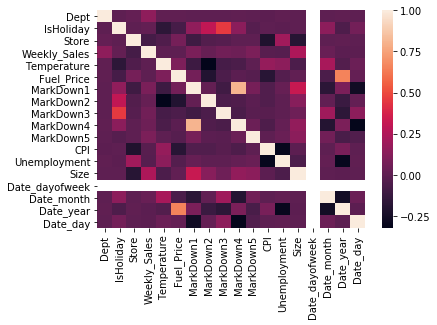

In [19]:
sns.heatmap(corrm)

In [20]:
df_features_stores.dtypes

Date              datetime64[ns]
Dept                       int64
IsHoliday                   bool
Split                     object
Store                      int64
Weekly_Sales             float64
Temperature              float64
Fuel_Price               float64
MarkDown1                float64
MarkDown2                float64
MarkDown3                float64
MarkDown4                float64
MarkDown5                float64
CPI                      float64
Unemployment             float64
Type                      object
Size                       int64
Date_dayofweek             int64
Date_month                 int64
Date_year                  int64
Date_day                   int64
dtype: object

In [21]:
numeric_var_names=[key for key in dict(df_features_stores.dtypes) if dict(df_features_stores.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(df_features_stores.dtypes) if dict(df_features_stores.dtypes)[key] in ['object', 'O','bool','datetime64[ns]']]
print(numeric_var_names)
print(cat_var_names)

['Dept', 'Store', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Date_dayofweek', 'Date_month', 'Date_year', 'Date_day']
['Date', 'IsHoliday', 'Split', 'Type']


In [22]:
df_features_stores_num=df_features_stores[numeric_var_names]
df_features_stores_cat=df_features_stores[cat_var_names]

In [23]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

df_features_stores_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Dept,536634.0,0.0,2.376070e+07,44.277301,37.00000,30.527358,9.319196e+02,0.689458,1.000,1.000,4.000000,7.000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Store,536634.0,0.0,1.191790e+07,22.208621,22.00000,12.790580,1.635989e+02,0.575929,1.000,1.000,3.000000,5.000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Weekly_Sales,421570.0,115064.0,6.737219e+09,15981.258123,7612.03000,22711.183519,5.157979e+08,1.421114,-4988.940,5.000,59.974500,291.097,2079.650000,7612.03000,20205.852500,42845.673000,61201.951000,106479.586000,693099.360000
Temperature,536634.0,0.0,3.153893e+07,58.771762,60.06000,18.678716,3.488944e+02,0.317818,-7.290,16.870,26.490000,32.760,45.250000,60.06000,73.230000,82.840000,86.830000,92.440000,101.950000
Fuel_Price,536634.0,0.0,1.829015e+06,3.408310,3.52300,0.430861,1.856414e-01,0.126415,2.472,2.572,2.671000,2.759,3.041000,3.52300,3.744000,3.906000,4.021000,4.193000,4.468000
MarkDown1,265596.0,271038.0,1.975504e+09,7438.004144,5126.54000,9411.341379,8.857335e+07,1.265305,-2781.450,18.200,163.950000,403.310,2114.640000,5126.54000,9303.850000,15308.070000,22494.620000,53311.880000,103184.980000
MarkDown2,197685.0,338949.0,6.937310e+08,3509.274827,385.31000,8992.047197,8.085691e+07,2.562366,-265.760,0.010,3.000000,10.780,72.500000,385.31000,2392.390000,8762.330000,18632.140000,47382.720000,104519.540000
MarkDown3,242326.0,294308.0,4.502208e+08,1857.913525,40.76000,11616.143274,1.349348e+08,6.252252,-179.260,0.100,0.850000,2.000,7.220000,40.76000,174.260000,573.920000,1330.530000,76740.950000,149483.310000
MarkDown4,237143.0,299491.0,7.995411e+08,3371.556866,1239.04000,6872.281734,4.722826e+07,2.038311,0.220,3.000,22.430000,54.640,336.240000,1239.04000,3397.080000,7805.380000,13110.540000,41847.940000,67474.850000
MarkDown5,266496.0,270138.0,1.152334e+09,4324.021158,2870.91000,13549.262124,1.835825e+08,3.133487,-185.170,317.190,636.430000,888.900,1570.112500,2870.91000,5012.220000,7888.040000,10421.010000,23525.360000,771448.100000


In [24]:
df_features_stores_num.isnull().sum()

Dept                   0
Store                  0
Weekly_Sales      115064
Temperature            0
Fuel_Price             0
MarkDown1         271038
MarkDown2         338949
MarkDown3         294308
MarkDown4         299491
MarkDown5         270138
CPI                38162
Unemployment       38162
Size                   0
Date_dayofweek         0
Date_month             0
Date_year              0
Date_day               0
dtype: int64



We can probably safely fill all missing values with zero. For the markdowns this means that there was no markdown. For the weekly sales, the missing values are the ones we have to predict, so it does not really matter what we fill in there.


In [25]:
#Removing rows with null values in all columns
df_features_stores_num.dropna(axis=0, how="all", inplace=True)
#Removing all rows with null values in all rows
df_features_stores_num.dropna(axis=1, how="all", inplace=True)

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [26]:
#Handling missings 
df_features_stores_num.fillna(0, inplace=True)

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [27]:
df_features_stores_num.shape

(536634, 17)

In [28]:
df_features_stores_num.isna().sum()

Dept              0
Store             0
Weekly_Sales      0
Temperature       0
Fuel_Price        0
MarkDown1         0
MarkDown2         0
MarkDown3         0
MarkDown4         0
MarkDown5         0
CPI               0
Unemployment      0
Size              0
Date_dayofweek    0
Date_month        0
Date_year         0
Date_day          0
dtype: int64

In [29]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

df_features_stores_num=df_features_stores_num.apply(outlier_capping)

Dummy variables: Categorical Data

In [30]:
df_features_stores['IsHoliday'].unique()

array([False,  True])

In [31]:
j=1
for i in df_features_stores_cat['Type'].unique():
    df_features_stores_cat['Type'][df_features_stores_cat['Type']==i] = j
    j=j+1
df_features_stores_cat['Type'].unique()

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http:/

array([1, 2, 3], dtype=object)

In [32]:
j=0
for i in df_features_stores_cat['IsHoliday'].unique():
    df_features_stores_cat['IsHoliday'][df_features_stores_cat['IsHoliday']==i] = j
    j=j+1
df_features_stores_cat['IsHoliday'].unique()

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http:/

array([0., 1.])

In [33]:
df_features_stores_final = pd.concat([df_features_stores_num,df_features_stores_cat], axis=1)
df_features_stores_final.head()

,Dept,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Unemployment,Size,Date_dayofweek,Date_month,Date_year,Date_day,Date,IsHoliday,Split,Type
0,1.0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,8.106,151315.0,4.0,2.0,2010.0,5.0,2010-02-05,0.0,Train,1
1,2.0,1.0,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,8.106,151315.0,4.0,2.0,2010.0,5.0,2010-02-05,0.0,Train,1
2,3.0,1.0,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,8.106,151315.0,4.0,2.0,2010.0,5.0,2010-02-05,0.0,Train,1
3,4.0,1.0,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,8.106,151315.0,4.0,2.0,2010.0,5.0,2010-02-05,0.0,Train,1
4,5.0,1.0,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,8.106,151315.0,4.0,2.0,2010.0,5.0,2010-02-05,0.0,Train,1


In [34]:
df_features_stores_final.Store.value_counts()

13.0    13310
10.0    13097
4.0     13075
2.0     13035
1.0     13027
24.0    13018
27.0    13016
6.0     12999
34.0    12991
20.0    12988
32.0    12959
19.0    12947
31.0    12896
28.0    12858
41.0    12842
11.0    12818
40.0    12755
23.0    12753
14.0    12746
15.0    12599
8.0     12594
39.0    12582
18.0    12557
26.0    12555
17.0    12546
25.0    12488
7.0     12431
12.0    12328
22.0    12306
45.0    12263
21.0    12201
35.0    12103
16.0    12057
29.0    12009
3.0     11509
5.0     11446
9.0     11302
38.0     9349
44.0     9241
37.0     9219
30.0     9110
42.0     8915
43.0     8614
33.0     8240
36.0     7940
Name: Store, dtype: int64

In [35]:
df_features_stores_final['IsHoliday'] = df_features_stores_final['IsHoliday'].astype(int)
df_features_stores_final['IsHoliday'].unique()

array([0, 1], dtype=int64)

In [36]:
train = df_features_stores_final.loc[df_features_stores_final['Split']=='Train']
test = df_features_stores_final.loc[df_features_stores_final['Split']=='Test']

Making New Holiday Variable Based on Given Data

In [37]:
df_features_stores_final['Super_Bowl'] = np.where((df_features_stores_final['Date']==datetime(2010, 2, 12)) | (df_features_stores_final['Date']==datetime(2011, 2, 11)) | (df_features_stores_final['Date']==datetime(2012, 2, 10)) | (df_features_stores_final['Date']==datetime(2013, 2, 8)),1,0)
df_features_stores_final['Labour_Day'] = np.where((df_features_stores_final['Date']==datetime(2010, 9, 10)) | (df_features_stores_final['Date']==datetime(2011, 9, 9)) | (df_features_stores_final['Date']==datetime(2012, 9, 7)) | (df_features_stores_final['Date']==datetime(2013, 9, 6)),1,0)
df_features_stores_final['Thanksgiving'] = np.where((df_features_stores_final['Date']==datetime(2010, 11, 26)) | (df_features_stores_final['Date']==datetime(2011, 11, 25)) | (df_features_stores_final['Date']==datetime(2012, 11, 23)) | (df_features_stores_final['Date']==datetime(2013, 11, 29)),1,0)
df_features_stores_final['Christmas'] = np.where((df_features_stores_final['Date']==datetime(2010, 12, 31)) | (df_features_stores_final['Date']==datetime(2011, 12, 30)) | (df_features_stores_final['Date']==datetime(2012, 12, 28)) | (df_features_stores_final['Date']==datetime(2013, 12, 27)),1,0)

In [38]:
train['Super_Bowl'] = np.where((train['Date']==datetime(2010, 2, 12)) | (train['Date']==datetime(2011, 2, 11)) | (train['Date']==datetime(2012, 2, 10)) | (train['Date']==datetime(2013, 2, 8)),1,0)
train['Labour_Day'] = np.where((train['Date']==datetime(2010, 9, 10)) | (train['Date']==datetime(2011, 9, 9)) | (train['Date']==datetime(2012, 9, 7)) | (train['Date']==datetime(2013, 9, 6)),1,0)
train['Thanksgiving'] = np.where((train['Date']==datetime(2010, 11, 26)) | (train['Date']==datetime(2011, 11, 25)) | (train['Date']==datetime(2012, 11, 23)) | (train['Date']==datetime(2013, 11, 29)),1,0)
train['Christmas'] = np.where((train['Date']==datetime(2010, 12, 31)) | (train['Date']==datetime(2011, 12, 30)) | (train['Date']==datetime(2012, 12, 28)) | (train['Date']==datetime(2013, 12, 27)),1,0)
#........................................................................
test['Super_Bowl'] = np.where((test['Date']==datetime(2010, 2, 12)) | (test['Date']==datetime(2011, 2, 11)) | (test['Date']==datetime(2012, 2, 10)) | (test['Date']==datetime(2013, 2, 8)),1,0)
test['Labour_Day'] = np.where((test['Date']==datetime(2010, 9, 10)) | (test['Date']==datetime(2011, 9, 9)) | (test['Date']==datetime(2012, 9, 7)) | (test['Date']==datetime(2013, 9, 6)),1,0)
test['Thanksgiving'] = np.where((test['Date']==datetime(2010, 11, 26)) | (test['Date']==datetime(2011, 11, 25)) | (test['Date']==datetime(2012, 11, 23)) | (test['Date']==datetime(2013, 11, 29)),1,0)
test['Christmas'] = np.where((test['Date']==datetime(2010, 12, 31)) | (test['Date']==datetime(2011, 12, 30)) | (test['Date']==datetime(2012, 12, 28)) | (test['Date']==datetime(2013, 12, 27)),1,0)

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [39]:
# Altering the isHoliday value depending on these new holidays...
df_features_stores_final['IsHoliday']=(df_features_stores_final['IsHoliday']) | (df_features_stores_final['Super_Bowl']) | (df_features_stores_final['Labour_Day']) | (df_features_stores_final['Thanksgiving']) | (df_features_stores_final['Christmas'])

In [40]:
# Altering the isHoliday value depending on these new holidays...
train['IsHoliday']=(train['IsHoliday']) | (train['Super_Bowl']) | (train['Labour_Day']) | (train['Thanksgiving']) | (train['Christmas'])
test['IsHoliday']=(test['IsHoliday']) | (test['Super_Bowl']) | (test['Labour_Day']) | (test['Thanksgiving']) | (test['Christmas'])

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
# Since we have Imputed IsHoliday according to Extra holidays..These extra holiday variable has redundant..
# Droping the Extra holiday variables because its redundant..
dp=['Super_Bowl','Labour_Day','Thanksgiving','Christmas']
df_features_stores_final.drop(dp,axis=1,inplace=True)
#test.drop(dp,axis=1,inplace=True)

Classification & Accuracy

In [42]:
#### train X= Exery thing except Weekly_Sales
train_X=train.drop(['Weekly_Sales','Date','Split'], axis=1)

#### train Y= Only Weekly_Sales 
train_y=train['Weekly_Sales'] 
test_X=test.drop(['Weekly_Sales','Date','Split'],axis=1).copy()

train_X.shape, train_y.shape, test_X.shape

((421570, 22), (421570,), (115064, 22))

## Building models with simple regression technique without taking lagged variables and without handling stationarity, trend and seasonality & comparing their RMSE values

1.Linear Regression

In [43]:
## Methood 1..
clf = LinearRegression()
clf.fit(train_X, train_y)
y_pred_linear=clf.predict(test_X)
acc_linear=round( clf.score(train_X, train_y) * 100, 2)
print ('scorbe:'+str(acc_linear) + ' percent')

scorbe:9.03 percent


2. Random Forest

In [44]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(train_X, train_y)
y_pred_rf=clf.predict(test_X)
acc_rf= round(clf.score(train_X, train_y) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 99 % 



In [45]:
df_features_stores_final['Dept'] = df_features_stores_final['Dept'].astype(int)
df_features_stores_final['IsHoliday'] = df_features_stores_final['IsHoliday'].astype(int)
df_features_stores_final['Store'] = df_features_stores_final['Store'].astype(int)
df_features_stores_final['Type'] = df_features_stores_final['Type'].astype(int)

In [46]:
# Get dataframe with averages per store and department to fill missing values on lagged sales with their respective medians
medians = pd.DataFrame({'Median Sales' :df_features_stores_final.loc[df_features_stores_final['Split']=='Train'].groupby(by=['Type','Dept','Store','Date_month','IsHoliday'])['Weekly_Sales'].median()}).reset_index()
medians.head()

,Type,Dept,Store,Date_month,IsHoliday,Median Sales
0,1,1,1,1.0,0,17350.585
1,1,1,1,2.0,0,23510.490
2,1,1,1,2.0,1,37887.170
3,1,1,1,3.0,0,21280.400
4,1,1,1,4.0,0,26318.080


In [47]:
medians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49772 entries, 0 to 49771
Data columns (total 6 columns):
Type            49772 non-null int64
Dept            49772 non-null int64
Store           49772 non-null int64
Date_month      49772 non-null float64
IsHoliday       49772 non-null int64
Median Sales    49772 non-null float64
dtypes: float64(2), int64(4)
memory usage: 2.3 MB


In [48]:
df_features_stores_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 536633
Data columns (total 21 columns):
Dept              536634 non-null int32
Store             536634 non-null int32
Weekly_Sales      536634 non-null float64
Temperature       536634 non-null float64
Fuel_Price        536634 non-null float64
MarkDown1         536634 non-null float64
MarkDown2         536634 non-null float64
MarkDown3         536634 non-null float64
MarkDown4         536634 non-null float64
MarkDown5         536634 non-null float64
CPI               536634 non-null float64
Unemployment      536634 non-null float64
Size              536634 non-null float64
Date_dayofweek    536634 non-null float64
Date_month        536634 non-null float64
Date_year         536634 non-null float64
Date_day          536634 non-null float64
Date              536634 non-null datetime64[ns]
IsHoliday         536634 non-null int32
Split             536634 non-null object
Type              536634 non-null int32
dtypes: d

In [49]:
# Merge by type, store, department and month
df_features_stores_final = df_features_stores_final.merge(medians, how = 'outer', on = ['Type','Dept','Store','Date_month','IsHoliday'])

In [50]:
df_features_stores_final.columns

Index(['Dept', 'Store', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size', 'Date_dayofweek', 'Date_month', 'Date_year',
       'Date_day', 'Date', 'IsHoliday', 'Split', 'Type', 'Median Sales'],
      dtype='object')

In [51]:
# Fill NA
df_features_stores_final['Median Sales'].fillna(df_features_stores_final['Median Sales'].loc[df_features_stores_final['Split']=='Train'].median(), inplace=True) 

# Create a key for easy access

df_features_stores_final['Key'] = df_features_stores_final['Type'].map(str)+df_features_stores_final['Dept'].map(str)+df_features_stores_final['Store'].map(str)+df_features_stores_final['Date'].map(str)+df_features_stores_final['IsHoliday'].map(str)

In [52]:
df_features_stores_final.head()

,Dept,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Date_dayofweek,Date_month,Date_year,Date_day,Date,IsHoliday,Split,Type,Median Sales,Key
0,1,1,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2010.0,5.0,2010-02-05,0,Train,1,23510.49,1112010-02-05 00:00:000
1,1,1,41595.55,39.93,2.572,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2010.0,19.0,2010-02-19,0,Train,1,23510.49,1112010-02-19 00:00:000
2,1,1,19403.54,46.63,2.572,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2010.0,26.0,2010-02-26,0,Train,1,23510.49,1112010-02-26 00:00:000
3,1,1,21665.76,42.27,2.989,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2011.0,4.0,2011-02-04,0,Train,1,23510.49,1112011-02-04 00:00:000
4,1,1,46845.87,57.36,3.045,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,2011.0,18.0,2011-02-18,0,Train,1,23510.49,1112011-02-18 00:00:000



Lagged Variables:
For creating input depends on previous value

In [53]:
# Attach variable of last weeks time
df_features_stores_final['DateLagged'] = df_features_stores_final['Date']- timedelta(days=7)
df_features_stores_final.head()

,Dept,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Date_month,Date_year,Date_day,Date,IsHoliday,Split,Type,Median Sales,Key,DateLagged
0,1,1,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,2.0,2010.0,5.0,2010-02-05,0,Train,1,23510.49,1112010-02-05 00:00:000,2010-01-29
1,1,1,41595.55,39.93,2.572,0.0,0.0,0.0,0.0,0.0,...,2.0,2010.0,19.0,2010-02-19,0,Train,1,23510.49,1112010-02-19 00:00:000,2010-02-12
2,1,1,19403.54,46.63,2.572,0.0,0.0,0.0,0.0,0.0,...,2.0,2010.0,26.0,2010-02-26,0,Train,1,23510.49,1112010-02-26 00:00:000,2010-02-19
3,1,1,21665.76,42.27,2.989,0.0,0.0,0.0,0.0,0.0,...,2.0,2011.0,4.0,2011-02-04,0,Train,1,23510.49,1112011-02-04 00:00:000,2011-01-28
4,1,1,46845.87,57.36,3.045,0.0,0.0,0.0,0.0,0.0,...,2.0,2011.0,18.0,2011-02-18,0,Train,1,23510.49,1112011-02-18 00:00:000,2011-02-11


In [54]:
# Make a sorted dataframe. This will allow us to find lagged variables much faster!
sorted_df = df_features_stores_final.sort_values(['Store', 'Dept','Date'], ascending=[1, 1,1])
sorted_df = sorted_df.reset_index(drop=True) # Reinitialize the row indices for the loop to work

In [55]:
sorted_df['LaggedSales'] = np.nan # Initialize column
sorted_df['LaggedAvailable'] = np.nan # Initialize column
last=df_features_stores_final.loc[0] # intialize last row for first iteration. Doesn't really matter what it is
row_len = sorted_df.shape[0]
for index, row in sorted_df.iterrows():
    lag_date = row["DateLagged"]
    # Check if it matches by comparing last weeks value to the compared date 
    # And if weekly sales aren't 0
    if((last['Date']== lag_date) & (last['Weekly_Sales']>0)): 
        sorted_df.set_value(index, 'LaggedSales',last['Weekly_Sales'])
        sorted_df.set_value(index, 'LaggedAvailable',1)
    else:
        sorted_df.set_value(index, 'LaggedSales',row['Median Sales']) # Fill with median
        sorted_df.set_value(index, 'LaggedAvailable',0)

    last = row #Remember last row for speed
    if(index%int(row_len/10)==0): #See progress by printing every 10% interval
        print(str(int(index*100/row_len))+'% loaded')

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added

0% loaded
9% loaded
19% loaded
29% loaded
39% loaded
49% loaded
59% loaded
69% loaded
79% loaded
89% loaded
99% loaded


In [56]:
sorted_df[['Dept', 'Store','Date','LaggedSales','Weekly_Sales','Median Sales']].head()

,Dept,Store,Date,LaggedSales,Weekly_Sales,Median Sales
0,1,1,2010-02-05,23510.49,24924.50,23510.49
1,1,1,2010-02-12,24924.50,46039.49,37887.17
2,1,1,2010-02-19,46039.49,41595.55,23510.49
3,1,1,2010-02-26,41595.55,19403.54,23510.49
4,1,1,2010-03-05,19403.54,21827.90,21280.40


In [57]:
# Merge by store and department
df_features_stores_final = df_features_stores_final.merge(sorted_df[['Dept', 'Store','Date','LaggedSales','LaggedAvailable']], how = 'inner', on = ['Dept', 'Store','Date'])


Take differencing for lagged sales to make it stationary and to handle seasonality

In [58]:
df_features_stores_final['Sales_dif'] = df_features_stores_final['Median Sales'] - df_features_stores_final['LaggedSales']
df_features_stores_final[['Dept', 'Store','Date','LaggedSales','Weekly_Sales','Median Sales']].head(10)

,Dept,Store,Date,LaggedSales,Weekly_Sales,Median Sales
0,1,1,2010-02-05,23510.49,24924.50,23510.49
1,1,1,2010-02-19,46039.49,41595.55,23510.49
2,1,1,2010-02-26,41595.55,19403.54,23510.49
3,1,1,2011-02-04,18461.18,21665.76,23510.49
4,1,1,2011-02-18,37887.17,46845.87,23510.49
5,1,1,2011-02-25,46845.87,19363.83,23510.49
6,1,1,2012-02-03,18378.16,23510.49,23510.49
7,1,1,2012-02-17,36988.49,54060.10,23510.49
8,1,1,2012-02-24,54060.10,20124.22,23510.49
9,1,1,2013-02-01,23510.49,0.00,23510.49


Take differencing for Weekly sales to make it stationary and to handle trend

In [59]:
df_features_stores_final['Difference'] = df_features_stores_final['Median Sales'] - df_features_stores_final['Weekly_Sales']

In [60]:
df_features_stores_final.head()

,Dept,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,IsHoliday,Split,Type,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,1,1,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,...,0,Train,1,23510.49,1112010-02-05 00:00:000,2010-01-29,23510.49,0.0,0.00,-1414.01
1,1,1,41595.55,39.93,2.572,0.0,0.0,0.0,0.0,0.0,...,0,Train,1,23510.49,1112010-02-19 00:00:000,2010-02-12,46039.49,1.0,-22529.00,-18085.06
2,1,1,19403.54,46.63,2.572,0.0,0.0,0.0,0.0,0.0,...,0,Train,1,23510.49,1112010-02-26 00:00:000,2010-02-19,41595.55,1.0,-18085.06,4106.95
3,1,1,21665.76,42.27,2.989,0.0,0.0,0.0,0.0,0.0,...,0,Train,1,23510.49,1112011-02-04 00:00:000,2011-01-28,18461.18,1.0,5049.31,1844.73
4,1,1,46845.87,57.36,3.045,0.0,0.0,0.0,0.0,0.0,...,0,Train,1,23510.49,1112011-02-18 00:00:000,2011-02-11,37887.17,1.0,-14376.68,-23335.38


In [61]:
train = df_features_stores_final.loc[df_features_stores_final['Split']=='Train']
test = df_features_stores_final.loc[df_features_stores_final['Split']=='Test']
test.head()

,Dept,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,IsHoliday,Split,Type,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
9,1,1,0.0,56.46,3.244,9290.91,1359.90,265.00,20657.82,972.61,...,0,Test,1,23510.49,1112013-02-01 00:00:000,2013-01-25,23510.49,0.0,0.0,23510.49
10,1,1,0.0,49.66,3.475,35348.47,6665.52,47.21,13014.67,6310.18,...,0,Test,1,23510.49,1112013-02-15 00:00:000,2013-02-08,23510.49,0.0,0.0,23510.49
11,1,1,0.0,50.25,3.597,20107.75,3163.89,42.20,15657.30,5812.86,...,0,Test,1,23510.49,1112013-02-22 00:00:000,2013-02-15,23510.49,0.0,0.0,23510.49
21,2,1,0.0,56.46,3.244,9290.91,1359.90,265.00,20657.82,972.61,...,0,Test,1,47080.12,1212013-02-01 00:00:000,2013-01-25,47080.12,0.0,0.0,47080.12
22,2,1,0.0,49.66,3.475,35348.47,6665.52,47.21,13014.67,6310.18,...,0,Test,1,47080.12,1212013-02-15 00:00:000,2013-02-08,47080.12,0.0,0.0,47080.12



Test - dev

Usually, model performance can be evaluated on the out-of-sample test set. However, since that data is not available, it may be wise to split our training set one more time in order to be able to test out of sample performance. Let's give up 20% of our training set for this sanity check development set.


In [62]:
#### train X= Exery thing except Weekly_Sales
features=train.drop(['Weekly_Sales','Date','Split','Difference','DateLagged','Key','Median Sales'], axis=1)

#### train Y= Only Weekly_Sales 
target=train['Difference'] 
#test_X=test.drop(['Weekly_Sales','Date','Split'],axis=1).copy()

#train_X.shape, train_y.shape, test_X.shape

In [63]:
# Set seed for reproducability 
np.random.seed(42)
X_train, X_dev, y_train, y_dev = train_test_split(features, target, test_size=0.2, random_state=42)
print(X_dev.shape)
print(y_dev.shape)

(84658, 21)
(84658,)


## Random Forest

Train on random forest


In [64]:
#Random forest model specification
regr = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=2, warm_start=False)

#Train on data
regr.fit(X_train, y_train.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.2s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.7min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

In [65]:
acc_rf= round(regr.score(X_train, y_train.ravel()) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.3s finished


Accuracy: 89 % 



In [66]:
y_pred_random = regr.predict(X_dev)

y_dev = y_dev.to_frame()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.7s finished


In [67]:
y_dev['Predicted'] = y_pred_random
df_out = pd.merge(train,y_dev[['Predicted']],how = 'left',left_index = True, right_index = True,suffixes=['_True','_Pred'])
df_out = df_out[~pd.isnull(df_out['Predicted'])]
df_out.head()

,Dept,Store,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Split,Type,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,Predicted
2,1,1,19403.54,46.63,2.572,0.00,0.00,0.00,0.00,0.00,...,Train,1,23510.49,1112010-02-26 00:00:000,2010-02-19,41595.55,1.0,-18085.06,4106.95,1654.93100
7,1,1,54060.10,45.32,3.510,9873.33,11062.27,9.80,8409.31,3402.66,...,Train,1,23510.49,1112012-02-17 00:00:000,2012-02-10,36988.49,1.0,-13478.00,-30549.61,-24552.94275
14,2,1,44292.87,46.63,2.572,0.00,0.00,0.00,0.00,0.00,...,Train,1,47080.12,1212010-02-26 00:00:000,2010-02-19,47928.89,1.0,-848.77,2787.25,1101.40900
30,3,1,12485.78,56.55,3.360,34577.06,3579.21,160.53,24939.80,5630.40,...,Train,1,11135.17,1312012-02-03 00:00:000,2012-01-27,10613.17,1.0,522.00,-1350.61,-161.70550
39,4,1,35870.49,42.27,2.989,0.00,0.00,0.00,0.00,0.00,...,Train,1,36479.25,1412011-02-04 00:00:000,2011-01-28,32905.88,1.0,3573.37,608.76,-550.77675


In [68]:
df_out['prediction'] = df_out['Median Sales']-df_out['Predicted']

In [69]:
print("Medians: "+str(sum(abs(df_out['Difference']))/df_out.shape[0]))
print("Random Forest: "+str(sum(abs(df_out['Weekly_Sales']-df_out['prediction']))/df_out.shape[0]))

Medians: 1433.7734455928562
Random Forest: 1183.4720444606955




Looks good! Let's train on our full data set to get the maximum amount of information in our model

In [70]:
#Random forest model specification. Set n_estimators lower for faster performance
rf_model = RandomForestRegressor(n_estimators=80, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=0, warm_start=False)

#Train on data
rf_model.fit(features, target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [71]:
acc_rf= round(rf_model.score(features, target) * 100, 2)
print ("Accuracy: %i %% \n"%acc_rf)

Accuracy: 90 % 



## Forecasting sales

After we have created our model, we can predict things with it on the test set


In [72]:
test.drop(['Weekly_Sales'], axis=1, inplace=True)

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [73]:
test_features = test.drop(['Date','Split','Difference','DateLagged','Key','Median Sales'], axis=1)

In [74]:
final_y_prediction = rf_model.predict(test_features)

Subtract median sales with difference value to calculate weekly sales again

In [75]:
testfile = pd.concat([test.reset_index(drop=True), pd.DataFrame(final_y_prediction)], axis=1)
testfile['prediction'] = testfile['Median Sales']-testfile[0]
testfile.head()

,Dept,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Type,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,0,prediction
0,1,1,56.46,3.244,9290.91,1359.90,265.00,20657.82,972.61,224.235290,...,1,23510.49,1112013-02-01 00:00:000,2013-01-25,23510.49,0.0,0.0,23510.49,-1442.178812,24952.668813
1,1,1,49.66,3.475,35348.47,6665.52,47.21,13014.67,6310.18,224.276053,...,1,23510.49,1112013-02-15 00:00:000,2013-02-08,23510.49,0.0,0.0,23510.49,-1106.208125,24616.698125
2,1,1,50.25,3.597,20107.75,3163.89,42.20,15657.30,5812.86,224.420289,...,1,23510.49,1112013-02-22 00:00:000,2013-02-15,23510.49,0.0,0.0,23510.49,-1704.703437,25215.193438
3,2,1,56.46,3.244,9290.91,1359.90,265.00,20657.82,972.61,224.235290,...,1,47080.12,1212013-02-01 00:00:000,2013-01-25,47080.12,0.0,0.0,47080.12,-2249.461500,49329.581500
4,2,1,49.66,3.475,35348.47,6665.52,47.21,13014.67,6310.18,224.276053,...,1,47080.12,1212013-02-15 00:00:000,2013-02-08,47080.12,0.0,0.0,47080.12,-3072.876700,50152.996700


In [76]:
# Prediction value using Random Forest model..
submission = pd.DataFrame({
        "Store_Dept_Date": testfile.Store.astype(str)+'_'+testfile.Dept.astype(str)+'_'+testfile.Date.astype(str),
        "Weekly_Sales": testfile['prediction']
    })

submission.head()

,Store_Dept_Date,Weekly_Sales
0,1_1_2013-02-01,24952.668813
1,1_1_2013-02-15,24616.698125
2,1_1_2013-02-22,25215.193438
3,1_2_2013-02-01,49329.581500
4,1_2_2013-02-15,50152.996700


In [77]:
submission.to_csv('weekly_sales predicted.csv', index=False)